In [2]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
import glob
from scipy.signal import find_peaks

from neurolib.models.jr import JRModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [5]:
model = JRModel()
model.params['duration'] = 10.0*1000

Bifurcation Diagram

In [8]:
max_y0 = []
min_y0 = []
max_y1 = []
min_y1 = []
max_y2 = []
min_y2 = []
y0_frequencies = []
y1_frequencies = []
y2_frequencies = []
y0_fft_frequencies = []
y1_fft_frequencies = []
y2_fft_frequencies = []


model.params['sigma_ou'] = 0.0

def calculateMeanFrequency(model, x):
    if len(x) > 1:
        # Calculate the average period between peaks
        period = np.mean(np.diff(model.t[x]))
        # Convert period to frequency
        frequency = 1 / period
        return frequency
    else:
        return 0
    
def calculate_dominant_frequency(signal, dt):
    # Number of sample points
    N = len(signal)
    # Sample spacing
    T = dt
    # Compute the FFT
    yf = fft(signal)
    xf = fftfreq(N, T)[:N//2]
    # Find the peak frequency
    idx = np.argmax(np.abs(yf[:N//2]))
    dominant_freq = xf[idx]
    return dominant_freq

# these are the different input values that we want to scan
p_inputs = np.linspace(-0.6, 1, 100)
for ext_input in p_inputs:
    model.params['ext_input'] = ext_input
    model.run()
    max_y0.append(np.max(model.y0[0, -int(1000/model.params['dt']):]))
    min_y0.append(np.min(model.y0[0, -int(1000/model.params['dt']):]))
    max_y1.append(np.max(model.y1[0, -int(1000/model.params['dt']):]))
    min_y1.append(np.min(model.y1[0, -int(1000/model.params['dt']):]))
    max_y2.append(np.max(model.y2[0, -int(1000/model.params['dt']):]))
    min_y2.append(np.min(model.y2[0, -int(1000/model.params['dt']):]))
    
    y0_peaks, _ = find_peaks(model.y0[0, -int(3000/model.params['dt']):])
    y1_peaks, _ = find_peaks(model.y1[0, -int(3000/model.params['dt']):])
    y2_peaks, _ = find_peaks(model.y2[0, -int(3000/model.params['dt']):])

    y0_frequencies.append(calculateMeanFrequency(model, y0_peaks))
    y1_frequencies.append(calculateMeanFrequency(model, y1_peaks))
    y2_frequencies.append(calculateMeanFrequency(model, y2_peaks))

    # Calculate dominant frequencies using FFT
    y0_fft_frequencies.append(calculate_dominant_frequency(model.y0[0, -int(1000/model.params['dt']):], model.params['dt']))
    y1_fft_frequencies.append(calculate_dominant_frequency(model.y1[0, -int(1000/model.params['dt']):], model.params['dt']))
    y2_fft_frequencies.append(calculate_dominant_frequency(model.y2[0, -int(1000/model.params['dt']):], model.params['dt']))

In [10]:
p_input_values = p_inputs + model.params['ext_input_static']

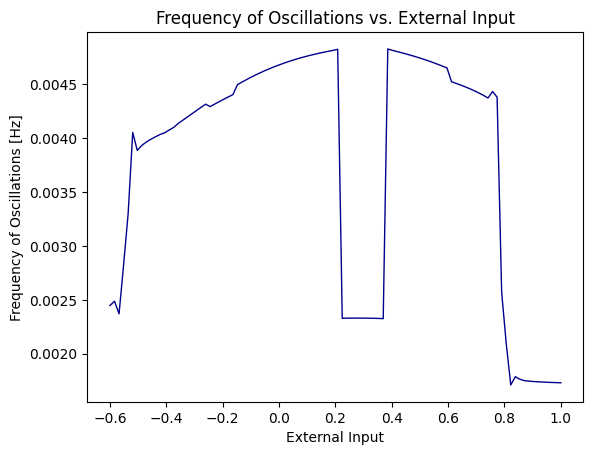

In [25]:
plt.plot(p_inputs, y0_frequencies, c='darkblue', lw=1)
#plt.plot(p_inputs, y1_frequencies, c='b', lw=2)
#plt.plot(p_inputs, y2_frequencies, c='r', lw=2)
plt.xlabel("External Input")
plt.ylabel("Frequency of Oscillations [Hz]")
plt.title("Frequency of Oscillations vs. External Input")
plt.show()

In [13]:
plt.plot(p_inputs, y0_fft_frequencies, c='k', lw=2)
#plt.plot(p_inputs, y1_fft_frequencies, c='b', lw=2)
#plt.plot(p_inputs, y2_fft_frequencies, c='r', lw=2)
plt.title("")
plt.xlabel("Input to p")
plt.ylabel("")

Text(0, 0.5, 'Min / max y0 [mV]')

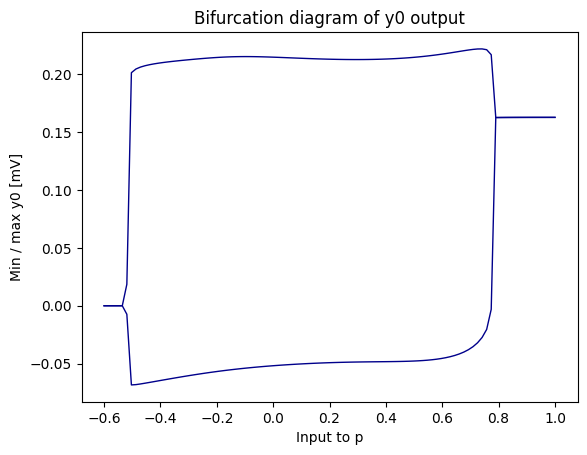

In [ ]:
plt.plot(p_inputs, max_y0, c='darkblue' , lw = 1)
plt.plot(p_inputs, min_y0, c='darkblue' , lw = 1)
plt.title("Bifurcation diagram of y0 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y0 [mV]")

Text(0, 0.5, 'Min / max y1 [mV]')

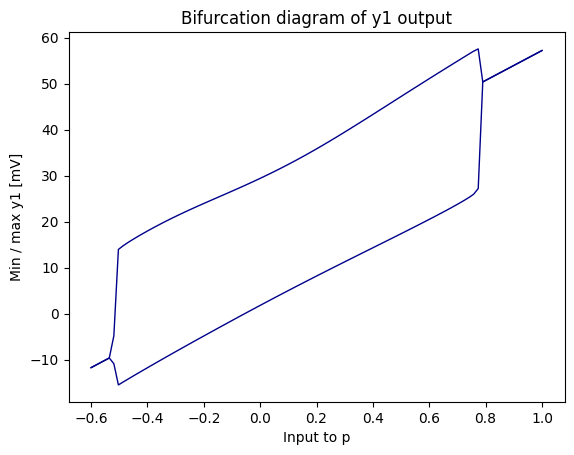

In [27]:
plt.plot(p_inputs, max_y1, c='darkblue', lw = 1)
plt.plot(p_inputs, min_y1, c='darkblue', lw = 1)
plt.title("Bifurcation diagram of y1 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y1 [mV]")

Text(0, 0.5, 'Min / max y2 [mV]')

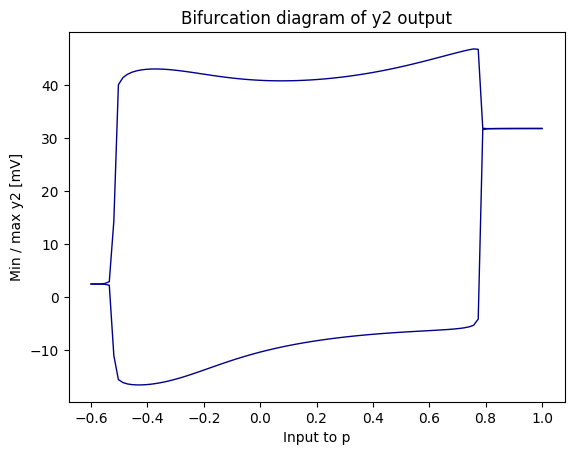

In [28]:
plt.plot(p_inputs, max_y2, c='darkblue', lw = 1)
plt.plot(p_inputs, min_y2, c='darkblue', lw = 1)
plt.title("Bifurcation diagram of y2 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y2 [mV]")

Text(0, 0.5, 'Min / max y1 & y2 [mV]')

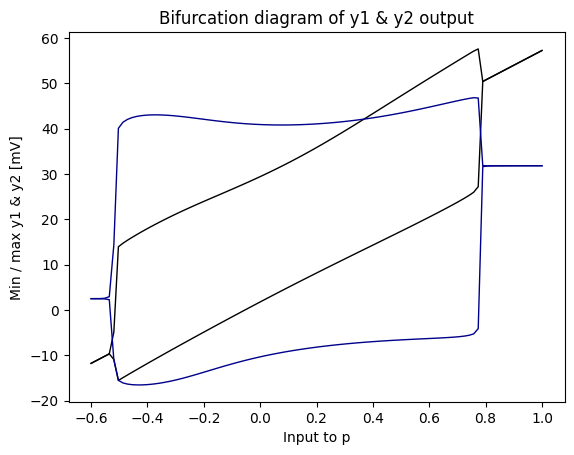

In [29]:
plt.plot(p_inputs, max_y1, c='k', lw = 1)
plt.plot(p_inputs, min_y1, c='k', lw = 1)
plt.plot(p_inputs, max_y2, c='darkblue', lw = 1)
plt.plot(p_inputs, min_y2, c='darkblue', lw = 1)
plt.title("Bifurcation diagram of y1 & y2 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y1 & y2 [mV]")

Text(0, 0.5, 'Min/Max y1, y2 [mV]')

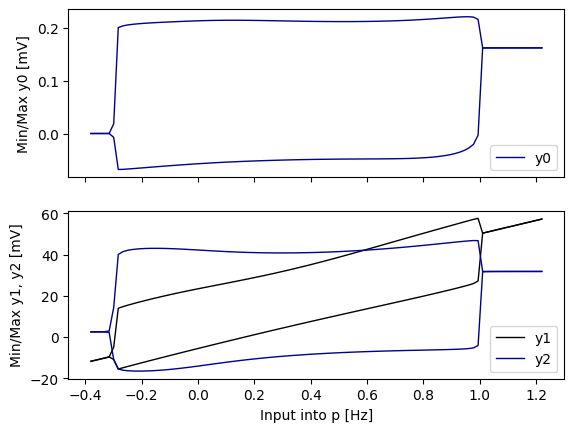

In [30]:
#plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax0, ax1) = plt.subplots(2,1, sharex=True)
#ax0.plot(model.t, model.y0.T, color='darkblue', linewidth=1.5)
ax0.plot(p_input_values.T, max_y0, color='darkblue', linewidth=1, label='y0')
ax0.plot(p_input_values.T, min_y0, color='darkblue', linewidth=1)
ax0.legend(loc='lower right')
#ax1.plot(model.t, model.y1.T - model.y2.T, color='darkblue', linewidth=1.5)
ax1.plot(p_input_values.T, max_y1, color='k', linewidth=1, label='y1')
ax1.plot(p_input_values.T, min_y1, color='k', linewidth=1)
ax1.plot(p_input_values.T, max_y2, color='darkblue', linewidth=1, label='y2')
ax1.plot(p_input_values.T, min_y2, color='darkblue', linewidth=1)
ax1.legend(loc='lower right')
ax1.set_xlabel("Input into p [Hz]", fontsize=10)
#ax1.set_xlim(-0.45, 1.0)
ax0.set_ylabel("Min/Max y0 [mV]", fontsize=10)
ax1.set_ylabel("Min/Max y1, y2 [mV]", fontsize=10)

Fazit: All output variables have their jump and fall at the same input 

Y0 & Y2: min values remain flat after jump (close to 0)
max values for y0 mainly constant after jump
max values for y2 minimal increase after jump

Y1: linear rising of max values after jump
linear rising of min values starting with larger input values
____

jump: Around -0.209
Fall: Around 0.73


Single Node

In [31]:
model = JRModel()
model.params['duration'] = 10000

In [32]:
y0_values = []
y1_values = []
y2_values = []
p_inputs = [-0.6, 0.0, 1.0]
for ext_input in p_inputs:
    model.params['ext_input'] = ext_input
    model.run()
    y0_values.append(model.y0.T)
    y1_values.append(model.y1.T)
    y2_values.append(model.y2.T)

Text(0, 0.5, 'Activity y0 [mV]')

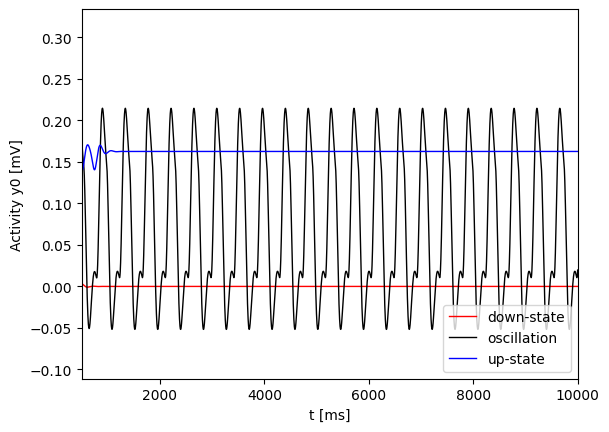

In [33]:
plt.plot(model.t, y0_values[0], c='r', lw = 1, label='down-state')
plt.plot(model.t, y0_values[1], c='k', lw = 1, label='oscillation')
plt.plot(model.t, y0_values[2], c='b', lw = 1, label='up-state')
plt.xlim(500, model.params['duration'])
plt.legend(loc='lower right')
plt.xlabel("t [ms]")
plt.ylabel("Activity y0 [mV]")

Text(0, 0.5, 'Activity y1 [mV]')

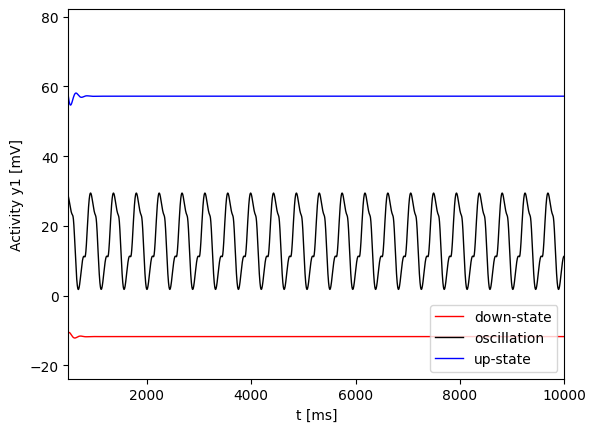

In [34]:

plt.plot(model.t, y1_values[0], c='r', lw = 1, label='down-state')
plt.plot(model.t, y1_values[1], c='k', lw = 1, label='oscillation')
plt.plot(model.t, y1_values[2], c='b', lw = 1, label='up-state')
plt.xlim(500, model.params['duration'])
plt.legend(loc='lower right')
plt.xlabel("t [ms]")
plt.ylabel("Activity y1 [mV]")

Text(0, 0.5, 'Activity y2 [mV]')

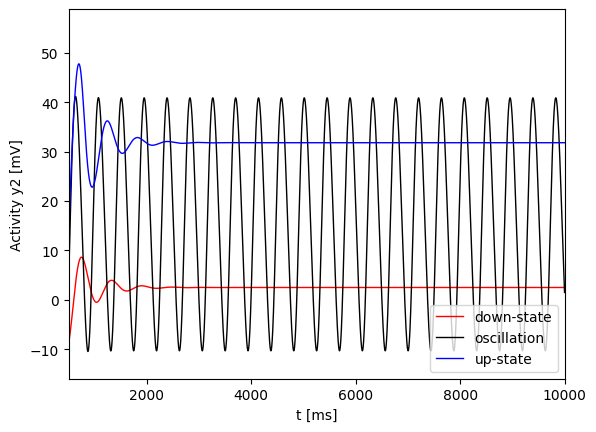

In [35]:
plt.plot(model.t, y2_values[0], c='r', lw = 1, label='down-state')
plt.plot(model.t, y2_values[1], c='k', lw = 1, label='oscillation')
plt.plot(model.t, y2_values[2], c='b', lw = 1, label='up-state')
plt.xlim(500, model.params['duration'])
plt.legend(loc='lower right')
plt.xlabel("t [ms]")
plt.ylabel("Activity y2 [mV]")

Fazit: Same state variable behavior (upstate, downstate, oszillation) for same input values 

Text(0, 0.5, 'Activity y1 [mV]')

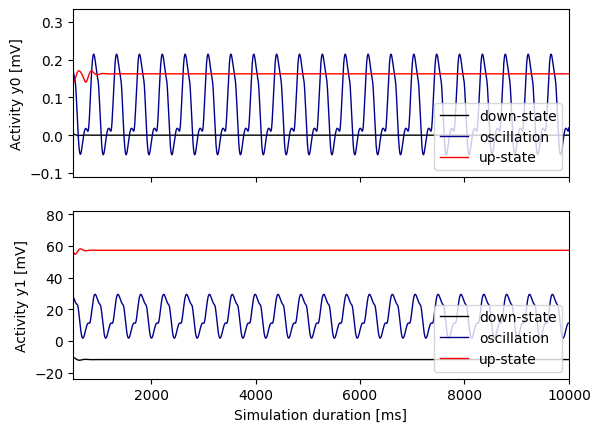

In [36]:
fig, (ax0, ax1) = plt.subplots(2,1, sharex=True)

ax0.plot(model.t, y0_values[0], color='k', lw = 1, label='down-state')
ax0.plot(model.t, y0_values[1], color='darkblue', lw = 1, label='oscillation')
ax0.plot(model.t, y0_values[2], color='r', lw = 1, label='up-state')
ax0.legend(loc='lower right')

ax1.plot(model.t, y1_values[0], color='k', lw = 1, label='down-state')
ax1.plot(model.t, y1_values[1], color='darkblue', lw = 1, label='oscillation')
ax1.plot(model.t, y1_values[2], color='r', lw = 1, label='up-state')
ax1.set_xlabel("Simulation duration [ms]", fontsize=10)
ax1.set_xlim(500, model.params['duration'])
ax1.legend(loc='lower right')

ax0.set_ylabel("Activity y0 [mV]", fontsize=10)
ax1.set_ylabel("Activity y1 [mV]", fontsize=10)